<a href="https://colab.research.google.com/github/Bramapark/TelecomX/blob/main/TelecomX_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# carga de datos:

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
with open('/content/TelecomX_Data.json') as f:
    raw_data = json.load(f)

In [8]:
# Normalizar estructura anidada
df = pd.json_normalize(raw_data)

In [9]:
# Transformación: limpiar columnas y tipos de datos
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype('bool')



In [10]:
# Reemplazar vacíos en Churn
df['Churn'] = df['Churn'].replace('', 'Unknown')

In [11]:
# Vista general
print(df.head())
print(df.info())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                   False              Yes   
1  0003-MKNFE    No            Male                   False               No   
2  0004-TLHLJ   Yes            Male                   False               No   
3  0011-IGKFF   Yes            Male                    True              Yes   
4  0013-EXCHZ   Yes          Female                    True              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

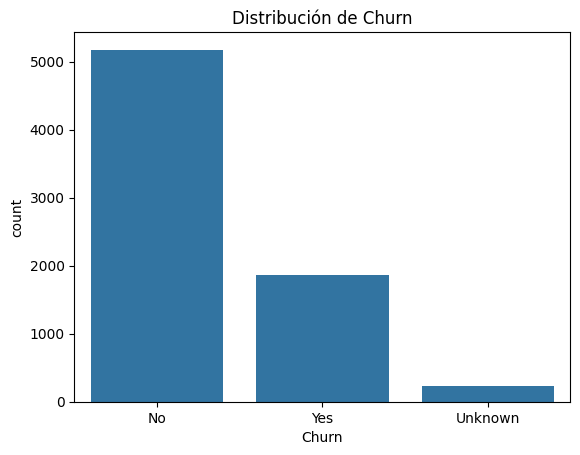

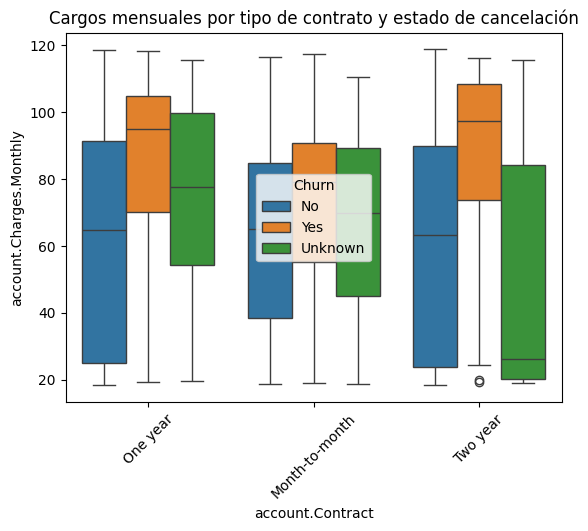

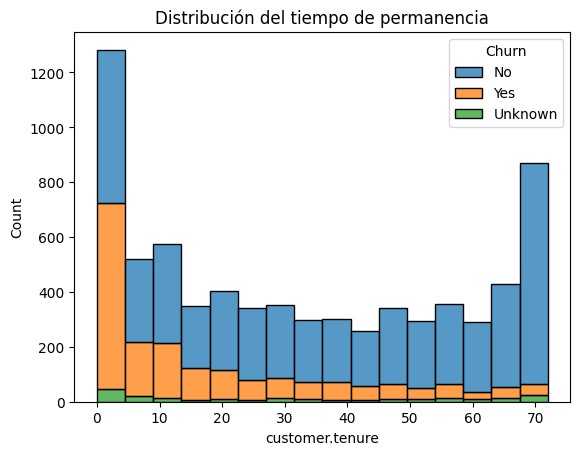

In [12]:
# Tasa de cancelación
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Churn')
plt.show()

# Comparación mensual de cargos por tipo de contrato
sns.boxplot(data=df, x='account.Contract', y='account.Charges.Monthly', hue='Churn')
plt.title('Cargos mensuales por tipo de contrato y estado de cancelación')
plt.xticks(rotation=45)
plt.show()

# Correlación entre tenure y cancelación
sns.histplot(data=df, x='customer.tenure', hue='Churn', multiple='stack')
plt.title('Distribución del tiempo de permanencia')
plt.show()